In [1]:
# import os, shutil
# original_db_dir = './train'
# base_dir = './cats_and_dogs_small'
# os.mkdir(base_dir)


# train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)
# validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)
# test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)


# train_cats_dir = os.path.join(train_dir, 'cats')
# os.mkdir(train_cats_dir)
# train_dogs_dir = os.path.join(train_dir, 'dogs')
# os.mkdir(train_dogs_dir)


# validation_cats_dir = os.path.join(validation_dir, 'cats')
# os.mkdir(validation_cats_dir)
# validation_dogs_dir = os.path.join(validation_dir, 'dogs')
# os.mkdir(validation_dogs_dir)


# test_cats_dir = os.path.join(test_dir, 'cats')
# os.mkdir(test_cats_dir)
# test_dogs_dir = os.path.join(test_dir, 'dogs')
# os.mkdir(test_dogs_dir)

In [2]:
# frames = ['cat.{}.jpg'.format(i) for i in range(1000)]
# for fname in frames:
#   src = os.path.join(original_db_dir, fname)
#   dst = os.path.join(train_cats_dir, fname)
#   shutil.copyfile(src,dst)


# frames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
# for fname in frames:
#   src = os.path.join(original_db_dir, fname)
#   dst = os.path.join(validation_cats_dir, fname)
#   shutil.copyfile(src,dst)
#   frames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]


# for fname in frames:
#   src = os.path.join(original_db_dir, fname)
#   dst = os.path.join(test_cats_dir, fname)
#   shutil.copyfile(src,dst)

In [3]:
import os, shutil
original_db_dir = './train'
base_dir = './cats_and_dogs_small'

train_dir = os.path.join(base_dir, 'train')

validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [4]:
!unzip cats_and_dogs_small.zip    > /dev/null

## 모델 구성하기

In [5]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import models

model = models.Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

## 모델 컴파일하기

In [6]:
from keras import optimizers
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=1e-4), metrics=['acc'])

## 이미지 데이터 전처리하기

In [7]:
# ImageDataGenerator 클래스는 디스크에 있는 이미지 파일을 읽음

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size=(150,150),
  batch_size=20,
  class_mode='binary'
  )
validation_generator = test_datagen.flow_from_directory(
  validation_dir,
  target_size=(150,150),
  batch_size=20,
  class_mode='binary'
  )

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [8]:
for data_batch, labels_batch in train_generator:
  print ('배치 데이터 크기:', data_batch.shape)
  print ('배치 레이블 크기:', labels_batch.shape)
  break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


## 모델 훈련하기

In [9]:
history = model.fit_generator( # 배치 제너레이터를 사용하여 모델 훈련
  train_generator,
  steps_per_epoch=train_generator.n//train_generator.batch_size,
  epochs=30,
  validation_data=validation_generator,
  validation_steps=validation_generator.n//validation_generator.batch_size
  )

model.save('cats_and_dogs_small_1.h5') # 모델 저장

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 110s 1s/step - loss: 0.6869 - acc: 0.5570 - val_loss: 0.7425 - val_acc: 0.2760
Epoch 2/30
100/100 [==============================] - 109s 1s/step - loss: 0.6567 - acc: 0.6005 - val_loss: 0.8046 - val_acc: 0.3455
Epoch 3/30
100/100 [==============================] - 110s 1s/step - loss: 0.6016 - acc: 0.6730 - val_loss: 0.5787 - val_acc: 0.7175
Epoch 4/30
100/100 [==============================] - 111s 1s/step - loss: 0.5554 - acc: 0.7225 - val_loss: 0.7647 - val_acc: 0.4995
Epoch 5/30
100/100 [==============================] - 111s 1s/step - loss: 0.5262 - acc: 0.7385 - val_loss: 0.4845 - val_acc: 0.7835
Epoch 6/30
100/100 [==============================] - 111s 1s/step - loss: 0.5006 - acc: 0.7490 - val_loss: 0.5374 - val_acc: 0.7290
Epoch 7/30
100/100 [==============================] - 111s 1s/step - loss: 0.4732 - acc: 0.7785 - val_loss: 0.4588 - val_acc: 0.7930
Epoch 8/30
100/100 [==============================] - 111s 1s/step - 

## 정확도와 손실 확인하기

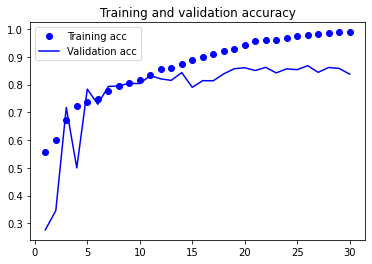

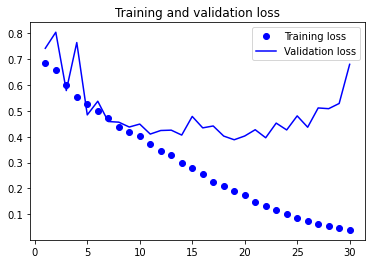

In [10]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()


plt.show()

## 모델 성능 향상시키기

In [11]:
datagen = ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.1,
  horizontal_flip=True,
  fill_mode='nearest'
)

In [12]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

## 데이터 증강

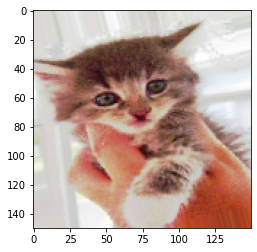

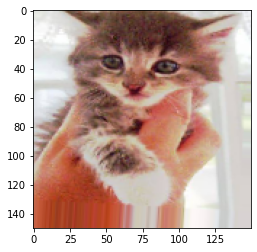

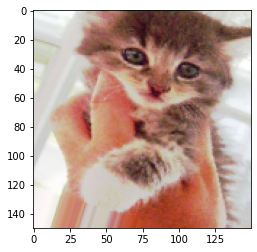

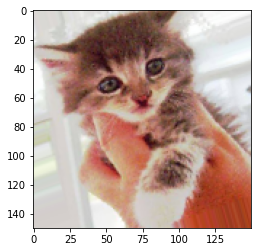

In [13]:
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])
img_path = fnames[3] # 증식할 이미지 선택
img = image.load_img(img_path, target_size=(150,150)) # 이미지를 읽고 크기 변경
x = image.img_to_array(img) # (150,150,3) 크기의 numpy 배열로 변환
x = x.reshape((1,)+x.shape) # (1,150,150,3) 크기로 변환
i=0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i%4 == 0:
    break
plt.show()

In [14]:
model = models.Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [15]:
train_datagen = ImageDataGenerator(
  rescale=1./255,
  rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  )

test_datagen = ImageDataGenerator(rescale=1./255) # 검증 데이터는 증식되민 안됨
train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size=(150,150),
  batch_size=32,
  class_mode='binary'
  )

validation_generator = test_datagen.flow_from_directory(
  validation_dir,
  target_size=(150,150),
  batch_size=32,
  class_mode='binary'
  )

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [20]:
model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=1e-4), metrics=['acc'])

In [21]:
history = model.fit_generator(
  train_generator,
  steps_per_epoch=100,
  epochs=300,
  validation_data=validation_generator,
  validation_steps=50
  )
model.save('cats_and_dogs_small_2.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/300
100/100 [==============================] - 115s 1s/step - loss: 0.6921 - acc: 0.5155 - val_loss: 0.7657 - val_acc: 0.2500


## Feature Extraction
- 사전 훈련된 네트워크 사용

In [22]:
# 사전에 학습된 네트워크의 표현을 사용하여 새로운 샘플에서 흥미로운 특성을 추출

from keras.applications.vgg16 import VGG16

conv_base = VGG16(
  weights='imagenet',
  include_top=False,
  input_shape=(150,150,3)
  )

conv_base.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

## Fast Feature Extraction without Data Augmentation

In [39]:
import os
import numpy as np

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [40]:
def extract_features(dir, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(
  dir,
  target_size = (150,150),
  batch_size = batch_size, 
  class_mode = 'binary'
  )
  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i*batch_size: (i+1)*batch_size] = features_batch
    labels[i*batch_size: (i+1)*batch_size] = labels_batch
    i += 1
    if i*batch_size >= sample_count:
      break
  return features, labels

In [41]:
validation_features, validation_labels = extract_features(validation_dir, 1000)
train_features, train_labels = extract_features(train_dir, 2000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [42]:
train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))

In [44]:
from keras.layers import Dense, Dropout
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(Dense(256, activation='relu', input_dim=4*4*512))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc']
              )
history = model.fit(
    train_features,
    train_labels,
    epochs=30,
    batch_size=20,
    validation_data=(validation_features, validation_labels)
)
model.save('cats_and_dogs_small_3.h5')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/30
100/100 [==============================] - 3s 24ms/step - loss: 0.5997 - acc: 0.6650 - val_loss: 0.4677 - val_acc: 0.8460
Epoch 2/30
100/100 [==============================] - 2s 22ms/step - loss: 0.4279 - acc: 0.8140 - val_loss: 0.3330 - val_acc: 0.9070
Epoch 3/30
100/100 [==============================] - 2s 22ms/step - loss: 0.3542 - acc: 0.8540 - val_loss: 0.2994 - val_acc: 0.9090
Epoch 4/30
100/100 [==============================] - 2s 22ms/step - loss: 0.3171 - acc: 0.8730 - val_loss: 0.2758 - val_acc: 0.9110
Epoch 5/30
100/100 [==============================] - 2s 22ms/step - loss: 0.2884 - acc: 0.8825 - val_loss: 0.2478 - val_acc: 0.9180
Epoch 6/30
100/100 [==============================] - 2s 22ms/step - loss: 0.2652 - acc: 0.8900 - val_loss: 0.2502 - val_acc: 0.9130
Epoch 7/30
100/100 [==============================] - 2s 22ms/step - loss: 0.2528 - acc: 0.9035 - val_loss: 0.2502 - val_acc: 0.9120
Epoch 8/30
100/100 [==============================] - 2s 22ms/step - 

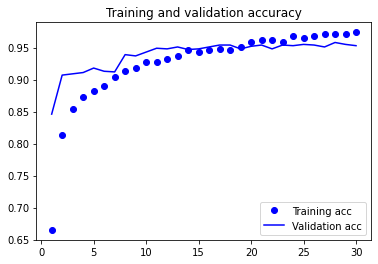

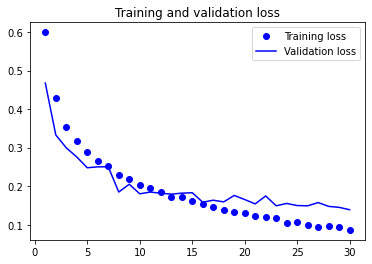

In [45]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [46]:
# 훨씬 느리고 비용이 많이 들지만 훈련하는 동안 data augmentation을 사용할 수 있음
from keras import models
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = models.Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [47]:
# 모델을 컴파일하고 훈련하기 전에 conv_base를 동결하는것이 매우 중요
# 훈련하는 동안 가중치가 업데이트 되지 않도록 막음
print ('conv_base를 동경하기 전 훈련되는 가중치의 수: ', len(model.trainable_weights))

conv_base를 동경하기 전 훈련되는 가중치의 수:  30


In [48]:
conv_base.trainable = False
print ('conv_base를 동경한 후 훈련되는 가중치의 수: ', len(model.trainable_weights))
# 변경사항을 적용하려면 모델을 컴파일
# 컴파일 후에 trainable 속성을 변경하면 반드시 모델을 다시 컴파일하지 않으면 변경사항이 적용되지 않음

conv_base를 동경한 후 훈련되는 가중치의 수:  4


In [49]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
  rescale=1./255,
  rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  fill_mode='nearest',
  )

test_datagen = ImageDataGenerator(rescale=1./255) # 검증 데이터는 증식되면 안됨

train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size=(150,150),
  batch_size=32,
  class_mode='binary'
  )

Found 2000 images belonging to 2 classes.


In [51]:
validation_generator = test_datagen.flow_from_directory(
  validation_dir,
  target_size=(150,150),
  batch_size=32,
  class_mode='binary'
  )

model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=2e-5),metrics=['acc'])

history = model.fit_generator(
  train_generator,
  steps_per_epoch=100,
  epochs=30,
  validation_data=validation_generator,
  validation_steps=50,
  verbose=2,
  )
model.save('cats_and_dogs_small_5.h5')

Found 2000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 - 702s - loss: 0.6075 - acc: 0.6790 - val_loss: 0.5343 - val_acc: 0.7688


## Fine Tuning
- 특성추출에 사용했던 동결모델의 상위 층 몇개를 동결에서 해제하고 모델에 새로 추가한
층(여기서는 완전연결분류기)와 함께 훈련

In [ ]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
      set_trainable = True
    if set_trainable:
      layer.trainable = True
    else:
      layer.trainable = False


model.compile(
  loss='binary_crossentropy',
  optimizer=RMSprop(lr=1e-5),
  metrics=['acc']
  )
history = model.fit_generator(
  train_generator,
  steps_per_epoch=train_generator.n//train_generator.batch_size,
  epochs=100,
  validation_data=validation_generator,
  validation_steps=validation_generator.n//validation_generator.batch_size
  )


# steps_per_epoch=train_generator.n//train_generator.batch_size,
# validation_steps=validation_generator.n//validation_generator.batch_size

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
62/62 [==============================] - 845s 14s/step - loss: 0.4411 - acc: 0.8084 - val_loss: 0.2685 - val_acc: 0.9027
Epoch 2/100
62/62 [==============================] - 844s 14s/step - loss: 0.3401 - acc: 0.8532 - val_loss: 0.1999 - val_acc: 0.9234
Epoch 3/100
62/62 [==============================] - 848s 14s/step - loss: 0.3106 - acc: 0.8659 - val_loss: 0.1915 - val_acc: 0.9304
Epoch 4/100
62/62 [==============================] - 844s 14s/step - loss: 0.2831 - acc: 0.8780 - val_loss: 0.1972 - val_acc: 0.9254
Epoch 5/100
 8/62 [==>...........................] - ETA: 6:45 - loss: 0.2967 - acc: 0.8711

In [ ]:
def smooth_curve(points, factor=0.8):
  smoothed_points=[]
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous*factor+point*(1-factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

  
plt.plot(epochs, smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

In [ ]:
test_generator = test_datagen.flow_from_directory(
  test_dir,
  target_size=(150,150),
  batch_size=20,
  class_mode='binary'
  )

test_loss, test_acc = model.evaluate_generator(test_generatorm steps=50)
print('test acc:', test_acc)